# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

**Примечание**: в этом блокноте отклонимся от стандартной практики импорта всех функций в самом начале

Импортировать будем много и сделаем это постепенно

# Загружаем данные в Pandas

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными

Загружаем наши данные из файла по прямой ссылке на git-hub

In [ ]:
DF = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_clean.csv', delimiter = ',')
DF

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32480  Volkswagen        Passat  2016      Sedan   88000.0   
32481  Land Rover    Freelander  2002  Crossover  225000.0   
32482       Dacia     Logan Mcv  2015  Universal   89000.0   
32483       Mazda             6  2006      Combi  370000.0   
32484     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1500.0        Diesel       Manual       6550.0  
3                    1600.0  Metan/Propan       Manual       4100.0  
4                    2200.0        Diesel       Manual       3490.0  
...                     ...           ...          ...          ...  
32480                1800.0        Petrol    Automatic      11500.0  
32481                1800.0  Metan/Propan       Manual       4400.0  
32482                1500.0        Diesel       Manual       7000.0  
32483                2000.0        Diesel       Manual       4000.0  
32484                1500.0        Diesel       Manual       4000.0  

[32485 rows x 9 columns]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Работа с данными

### Посчитаем число численных и категориальных колонок

In [ ]:
cat_columns = []
num_columns = []

for column_name in DF.columns:
    if (DF[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 len =  5
numerical columns:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 len =  4


# Предварительная Обработка

In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# но в исполнении scikit-learn

from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scikit-learn

from sklearn import preprocessing as prep  # общий модуль предварительной обработки scikit-learn
from sklearn import set_config # для доп настроек

In [ ]:
set_config(display="diagram") #чтобы была красивая визуализация

### Допустим смотрим задачу **классификации**

In [ ]:
data = DF.drop(columns = ['Transmission']) # в признаках нам не нужен 'Transmission'
target = DF['Transmission'] # поскольку это целевая метка

In [ ]:
cat_columns = cat_columns[:-1] # уберем 'Transmission' из списка категориальных данных

In [ ]:
cat_columns

['Make', 'Model', 'Style', 'Fuel_type']

## Приводим целевые метки к 0 и 1

Для этого воспользуемся объектом `LabelEncoder()` из модуля `preprocessing`

Применение преобразований уже стандартное для нас

* Создаем объект
* обучаем методом `.fit()`
* Смотрим что получилось

In [ ]:
Label = prep.LabelEncoder()
Label.fit(target) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

array(['Automatic', 'Manual'], dtype=object)

т.е. `0` это 'Automatic', а `1` это 'Manual'

In [ ]:
Label_encoded = Label.transform(target) # преобразуем и сохраняем в новую переменную

In [ ]:
Label_encoded # здесь уже только 0 и 1

array([0, 1, 1, ..., 1, 1, 1])

Разобъем Тренировочную выборку на тренировочную и валидационную (не забываем фиксировать сид при разбиении)

In [ ]:
random_state = 42

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data,Label_encoded,
                                                  test_size = 0.2, random_state = random_state)

В этом семестре мы рассмотрели только Логисчтическую регрессию - с ней и будем возится

In [ ]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn
from sklearn.metrics import f1_score # f1-мера

"Спрячем" оценку модели в отдельную функцию (при желании можно сделать ее другой)

In [ ]:
def calculate_f1_score(model_pipe, X, y):
    """Расчет коэффициента f1.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    """
    y_model = model_pipe.predict(X)
    return f1_score(y, y_model)

# Реализуем тоже самое, но через Pipeline


In [ ]:
from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

## Предобработка числовых данных (вставление пропусков + нормализация)

Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных

 **SimpleImputer** - заменяет пропуски на значения
возможные стратегии (strategy)


*   mean - среднее
*   median - медиана
*   most_frequent - мода
*   constant - какое-то конкретное значение (параметр fill_value='missing')




**MinMaxScaler** - Нормализация (можно стандартизацию - StandardScaler)


In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),

    ('scaler', MinMaxScaler())

])

In [ ]:
numerical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

## Предобработка категориальных данных (вставление пропусков + One-Hot кодирование)

Аналогичным образом поступаем для категориальных данных

 **One-Hot Encoding**, но в исполнении scikit-learn


In [ ]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

In [ ]:
categorical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

## Объединяем в единый Трансформер Колонок Данных

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

In [ ]:
preprocessors

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Year', 'Distance', 'Engine_capacity(cm3)',
                                  'Price(euro)']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Make', 'Model', 'Style', 'Fuel_type'])])

"Обучаем" стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся "по именам". Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [ ]:
preprocessors.fit(X_train);

### Про то, как оттуда извлекать имена признаков
(и вообще как тут все устроено)

это можно делать ПОСЛЕ того как сделан `.fit()`

In [ ]:
cat_ohe_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_columns)
cat_ohe_names

array(['Make_Alfa Romeo', 'Make_Alta marca', 'Make_Audi', 'Make_BMW',
       'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroen',
       'Make_Dacia', 'Make_Daewoo', 'Make_Daihatsu', 'Make_Dodge',
       'Make_Fiat', 'Make_Ford', 'Make_GAZ', 'Make_Honda', 'Make_Hyundai',
       'Make_Infiniti', 'Make_Jaguar', 'Make_Jeep', 'Make_KIA',
       'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_Mazda',
       'Make_Mercedes', 'Make_Mini', 'Make_Mitsubishi',
       'Make_Moskvich / Izh', 'Make_Nissan', 'Make_Opel', 'Make_Peugeot',
       'Make_Porsche', 'Make_Rare', 'Make_Renault', 'Make_Rover',
       'Make_Seat', 'Make_Skoda', 'Make_Smart', 'Make_Ssangyong',
       'Make_Subaru', 'Make_Suzuki', 'Make_Tesla', 'Make_Toyota',
       'Make_UAZ', 'Make_Vaz', 'Make_Volkswagen', 'Make_Volvo',
       'Model_1 Series', 'Model_100', 'Model_1007', 'Model_106',
       'Model_107', 'Model_108', 'Model_1102 Tavria', 'Model_121',
       'Model_147', 'Model_156', 'Model_159', 'Model_16


через стандартный метод `.transform()`

In [ ]:
train_data = preprocessors.transform(X_train) # преобразуем данные
columns = np.append(num_columns, cat_ohe_names) # объединяем названия колонок
pd.DataFrame(train_data, columns=columns,) #смотрим на датафрейм

Year  Distance  Engine_capacity(cm3)  Price(euro)  Make_Alfa Romeo  \
0      0.90  0.320481                0.4000     0.403594              0.0   
1      0.58  0.076482                0.2800     0.032129              0.0   
2      0.78  0.283999                0.2400     0.124498              0.0   
3      0.48  0.760000                0.3200     0.022088              0.0   
4      0.70  0.639999                0.3000     0.058233              0.0   
...     ...       ...                   ...          ...              ...   
25983  0.82  0.359999                0.2600     0.138554              0.0   
25984  0.70  0.499999                0.3800     0.078313              0.0   
25985  0.88  0.359425                0.2800     0.186747              0.0   
25986  0.70  0.599999                0.2792     0.034137              0.0   
25987  0.56  0.222220                0.3200     0.056225              0.0   

       Make_Alta marca  Make_Audi  Make_BMW  Make_Cadillac  Make_Chevrolet  \
0                  0.0        0.0       0.0            0.0             0.0   
1                  0.0        0.0       0.0            0.0             0.0   
2                  0.0        0.0       0.0            0.0             0.0   
3                  0.0        0.0       0.0            0.0             0.0   
4                  0.0        0.0       0.0            0.0             0.0   
...                ...        ...       ...            ...             ...   
25983              0.0        0.0       0.0            0.0             0.0   
25984              0.0        0.0       0.0            0.0             0.0   
25985              0.0        0.0       0.0            0.0             0.0   
25986              0.0        0.0       0.0            0.0             0.0   
25987              0.0        0.0       0.0            0.0             0.0   

       ...  Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  \
0      ...             0.0        0.0          1.0              0.0   
1      ...             0.0        0.0          0.0              1.0   
2      ...             0.0        0.0          0.0              1.0   
3      ...             0.0        0.0          1.0              0.0   
4      ...             0.0        0.0          0.0              1.0   
...    ...             ...        ...          ...              ...   
25983  ...             0.0        0.0          0.0              1.0   
25984  ...             0.0        0.0          0.0              1.0   
25985  ...             0.0        0.0          0.0              0.0   
25986  ...             0.0        0.0          1.0              0.0   
25987  ...             0.0        0.0          1.0              0.0   

       Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_Hybrid  \
0                   1.0                 0.0               0.0   
1                   0.0                 0.0               0.0   
2                   0.0                 0.0               0.0   
3                   0.0                 0.0               0.0   
4                   1.0                 0.0               0.0   
...                 ...                 ...               ...   
25983               1.0                 0.0               0.0   
25984               1.0                 0.0               0.0   
25985               1.0                 0.0               0.0   
25986               0.0                 0.0               0.0   
25987               0.0                 0.0               0.0   

       Fuel_type_Metan/Propan  Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  
0                         0.0               0.0                       0.0  
1                         1.0               0.0                       0.0  
2                         0.0               1.0                       0.0  
3                         0.0               1.0                       0.0  
4                         0.0               0.0                       0.0  
...                       ...               ...        

Аналогично действуем для валидационных данных

In [ ]:
val_data = preprocessors.transform(X_val)
pd.DataFrame(val_data, columns=columns,)

Year  Distance  Engine_capacity(cm3)  Price(euro)  Make_Alfa Romeo  \
0     0.80  0.091998                  0.96     0.495984              0.0   
1     0.80  0.211998                  0.44     0.300201              0.0   
2     0.78  0.329999                  0.28     0.156627              0.0   
3     0.40  0.059998                  0.32     0.028112              0.0   
4     0.78  0.179998                  0.44     0.196767              0.0   
...    ...       ...                   ...          ...              ...   
6492  0.48  0.571537                  0.32     0.056225              0.0   
6493  0.66  0.377599                  0.40     0.056225              0.0   
6494  0.76  0.373999                  0.40     0.121486              0.0   
6495  0.74  0.309999                  0.40     0.146586              0.0   
6496  0.56  0.508643                  0.20     0.026084              0.0   

      Make_Alta marca  Make_Audi  Make_BMW  Make_Cadillac  Make_Chevrolet  \
0                 0.0        0.0       0.0            0.0             0.0   
1                 0.0        0.0       0.0            0.0             0.0   
2                 0.0        1.0       0.0            0.0             0.0   
3                 0.0        0.0       1.0            0.0             0.0   
4                 0.0        0.0       0.0            0.0             0.0   
...               ...        ...       ...            ...             ...   
6492              0.0        0.0       1.0            0.0             0.0   
6493              0.0        0.0       0.0            0.0             0.0   
6494              0.0        0.0       0.0            0.0             0.0   
6495              0.0        0.0       0.0            0.0             0.0   
6496              0.0        0.0       0.0            0.0             0.0   

      ...  Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  \
0     ...             0.0        0.0          0.0              0.0   
1     ...             0.0        0.0          0.0              0.0   
2     ...             0.0        0.0          0.0              0.0   
3     ...             0.0        0.0          1.0              0.0   
4     ...             0.0        0.0          1.0              0.0   
...   ...             ...        ...          ...              ...   
6492  ...             0.0        0.0          1.0              0.0   
6493  ...             0.0        0.0          1.0              0.0   
6494  ...             0.0        0.0          0.0              1.0   
6495  ...             0.0        0.0          0.0              0.0   
6496  ...             0.0        0.0          0.0              0.0   

      Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_Hybrid  \
0                  0.0                 0.0               0.0   
1                  1.0                 0.0               0.0   
2                  0.0                 0.0               0.0   
3                  0.0                 0.0               0.0   
4                  1.0                 0.0               0.0   
...                ...                 ...               ...   
6492               0.0                 0.0               0.0   
6493               0.0                 0.0               0.0   
6494               1.0                 0.0               0.0   
6495               0.0                 0.0               0.0   
6496               0.0                 0.0               0.0   

      Fuel_type_Metan/Propan  Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  
0                        0.0               1.0                       0.0  
1                        0.0               0.0                       0.0  
2                        0.0               1.0                       0.0  
3                        0.0               1.0                       0.0  
4                        0.0               0.0                       0.0  
...                      ...               ...                       ...  
6492                     0.0     

## Объединяем Pipeline Предобработки и Модель

Синтаксис - тот же
Список из
* имен
* объектов

In [ ]:
pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LogisticRegression(C=0.001, random_state=42))
])

Чтобы "обратиться" к части Pipeline - достаточно помнить "имя"

In [ ]:
pipe['preprocessors']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Year', 'Distance', 'Engine_capacity(cm3)',
                                  'Price(euro)']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Make', 'Model', 'Style', 'Fuel_type'])])

In [ ]:
pipe['model']

LogisticRegression(C=0.001, random_state=42)

In [ ]:
pipe

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model', LogisticRegression(C=0.001, random_state=42))])

Так же обучаем через `.fit()`

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model', LogisticRegression(C=0.001, random_state=42))])

Оценим модель на Тренировочных и Валидационных данных

In [ ]:
print(f"F1 на тренировочной выборке: {calculate_f1_score(pipe, X_train, y_train):.4f}")

print(f"F1 на валидационной выборке: {calculate_f1_score(pipe, X_val, y_val):.4f}")

F1 на тренировочной выборке: 0.8342
F1 на валидационной выборке: 0.8362


Ссылка на [Оригинал](https://towardsdatascience.com/from-ml-model-to-ml-pipeline-9f95c32c6512) (относительно переработанный, но все же)

Там же будет пример о том, как Создавать свои кастомные Трансформаторы Данных



# Про то как Сохранять Модель

In [ ]:
from joblib import dump, load # в scikit-learn ничего такого особенного нет
# пользуемся jiblib

In [ ]:
dump(pipe, 'best_pipeline.joblib')  # чтобы сохранить объект (со всем чему обучился)

['best_pipeline.joblib']

Сохранит в Корневую папку

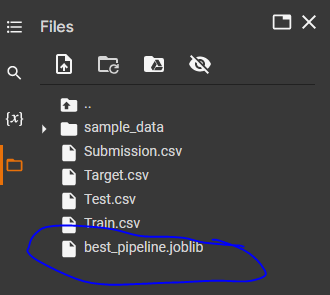

In [ ]:
pipe2 = load('best_pipeline.joblib')  # чтобы загрузить из файла в формате joblib

In [ ]:
pipe2

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model', LogisticRegression(C=0.001, random_state=42))])

Применим внось загруженный Pipeline к нашим Данным

In [ ]:
print(f"F1 на тренировочной выборке: {calculate_f1_score(pipe2, X_train, y_train):.4f}")

print(f"F1 на валидационной выборке: {calculate_f1_score(pipe2, X_val, y_val):.4f}")

F1 на тренировочной выборке: 0.8342
F1 на валидационной выборке: 0.8362


Ну вроде результаты совпадают, ура)




# Не предварительной обработкой единой

## Про полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # Объект для генерации полиномиальных признаков от scikit-learn

In [ ]:
PF = PolynomialFeatures(degree=2, # степень - вторая, хватит уж
                        include_bias=False, # если хотим добавить константу
                        interaction_only=False # если не хотим x^2, y^2, а только x*y
                        )

Добавляем в Pipeline

До! нормализации

In [ ]:
numerical_pipe_poly = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly_features', PF),
    ('scaler', MinMaxScaler()),
])

Заменяем числовой преобразователь в Трансформаторе колонок

In [ ]:
preprocessors_poly = ColumnTransformer(transformers=[
    ('num', numerical_pipe_poly, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

Обучаем методом `.fit()`

In [ ]:
preprocessors_poly.fit(X_train);

Если хотим получить "имена" полиноминальных признаков, то вользуемся той же идеалгогией, что и выше

* находим нужный Объект среди трансформеров / pipeline
* используем метод `.get_feature_names_out()`

In [ ]:
num_poly_names = preprocessors_poly.transformers_[0][1]['poly_features'].get_feature_names_out(num_columns)
num_poly_names

array(['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)',
       'Year^2', 'Year Distance', 'Year Engine_capacity(cm3)',
       'Year Price(euro)', 'Distance^2', 'Distance Engine_capacity(cm3)',
       'Distance Price(euro)', 'Engine_capacity(cm3)^2',
       'Engine_capacity(cm3) Price(euro)', 'Price(euro)^2'], dtype=object)

Применяем стандартный метод `.transform()`

In [ ]:
train_data = preprocessors_poly.transform(X_train)
columns_ = np.append(num_poly_names, cat_ohe_names)
pd.DataFrame(train_data, columns=columns_,)

Year  Distance  Engine_capacity(cm3)  Price(euro)    Year^2  \
0      0.90  0.320481                0.4000     0.403594  0.898873   
1      0.58  0.076482                0.2800     0.032129  0.576949   
2      0.78  0.283999                0.2400     0.124498  0.777851   
3      0.48  0.760000                0.3200     0.022088  0.476874   
4      0.70  0.639999                0.3000     0.058233  0.697370   
...     ...       ...                   ...          ...       ...   
25983  0.82  0.359999                0.2600     0.138554  0.818151   
25984  0.70  0.499999                0.3800     0.078313  0.697370   
25985  0.88  0.359425                0.2800     0.186747  0.878677   
25986  0.70  0.599999                0.2792     0.034137  0.697370   
25987  0.56  0.222220                0.3200     0.056225  0.556914   

       Year Distance  Year Engine_capacity(cm3)  Year Price(euro)  Distance^2  \
0           0.321118                   0.399406          0.402836    0.102709   
1           0.076026                   0.277365          0.031837    0.005850   
2           0.283716                   0.238930          0.123923    0.080656   
3           0.753578                   0.316196          0.021832    0.577600   
4           0.638091                   0.298068          0.057866    0.409600   
...              ...                        ...               ...         ...   
25983       0.359999                   0.259099          0.138051    0.129600   
25984       0.498508                   0.377553          0.077807    0.250000   
25985       0.359961                   0.279445          0.186334    0.129187   
25986       0.598210                   0.277402          0.033938    0.360000   
25987       0.220785                   0.316830          0.055664    0.049383   

       Distance Engine_capacity(cm3)  ...  Style_Roadster  Style_SUV  \
0                           0.152610  ...             0.0        0.0   
1                           0.025495  ...             0.0        0.0   
2                           0.081143  ...             0.0        0.0   
3                           0.289524  ...             0.0        0.0   
4                           0.228571  ...             0.0        0.0   
...                              ...  ...             ...        ...   
25983                       0.111429  ...             0.0        0.0   
25984                       0.226190  ...             0.0        0.0   
25985                       0.119809  ...             0.0        0.0   
25986                       0.199429  ...             0.0        0.0   
25987                       0.084656  ...             0.0        0.0   

       Style_Sedan  Style_Universal  Fuel_type_Diesel  Fuel_type_Electric  \
0              1.0              0.0               1.0                 0.0   
1              0.0              1.0               0.0                 0.0   
2              0.0              1.0               0.0                 0.0   
3              1.0              0.0               0.0                 0.0   
4              0.0              1.0               1.0                 0.0   
...            ...              ...               ...                 ...   
25983          0.0              1.0               1.0                 0.0   
25984          0.0              1.0               1.0                 0.0   
25985          0.0              0.0               1.0                 0.0   
25986          1.0              0.0               0.0                 0.0   
25987          1.0              0.0               0.0                 0.0   

       Fuel_type_Hybrid  Fuel_type_Metan/Propan  Fuel_type_Petrol  \
0                   0.0                     0.0               0.0   
1                   0.0                     1.0               0.0   
2                   0.0                     0.0               1.0   
3                   0.0                     0.0               1.0   
4                   0.0                     0.0           

In [ ]:
pipe_poly = Pipeline([
    ('preprocessors', preprocessors_poly),
    ('model', LogisticRegression(random_state=42,
                                 max_iter = 10000,
                                 solver = 'liblinear'))
])

Так же обучаем через `.fit()`

In [ ]:
pipe_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_features',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model',
                 LogisticRegression(max_iter=10000, random_state=42,
                                    solver='liblinear'))])

Оценим модель на Тренировочных и Валидационных данных

In [ ]:
print(f"F1 на тренировочной выборке: {calculate_f1_score(pipe_poly, X_train, y_train):.4f}")

print(f"F1 на валидационной выборке: {calculate_f1_score(pipe_poly, X_val, y_val):.4f}")

F1 на тренировочной выборке: 0.8792
F1 на валидационной выборке: 0.8736


In [ ]:
from sklearn.model_selection import GridSearchCV # для поиска по сетке гиперпараметров
# альтернативно можно воспользоваться RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
# альтернативно можно использовать StratifiedKFold т.к. задача классификации
import seaborn as sns # чтобы подкрасить таблички

Задаем Словарь гиперпараметров, которые мы хотим проверить

In [ ]:
param_grid = {
    # ВАЖНО используем "имена" которые есть у компонент Pipeline и разделяем их __ (две земли)
    # Поскольку PCA у нас "спрятан" то нужно пройти глубоко, идем с конца
    # ↓ pipe_gs
    #               ↓preprocessors_pca
    #                    ↓numerical_pipe_pca
    #                         ↓PCA
    "preprocessors__num__poly_features__degree": np.arange(1,4), # Варьируем количество главных компонент от 1 до 5 (количество числовых признаков)
    # ↓ pipe_gs
    #       ↓ LogisticRegression
    "model__C": np.logspace(-4, 4, 5), # аналог 10**np.linspace(-4,4,5) рассмотренного в блокноте про подбор гиперпараметров
}

Складываем всё аккуратно в GridSearch (можно и в Random Search)

In [ ]:
Pipe_gs_poly = GridSearchCV(estimator = pipe_poly, # оптимизируем наш pipeline
                       param_grid=param_grid , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                       verbose = 2 # чтобы он всё подробно расписал. если не интересно - пишем 0
                       )
Pipe_gs_poly

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
             estimator=Pipeline(steps=[('preprocessors',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly_features',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Year',
                                                                          'Distance',
                                                                          'Engine_capacit...
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Style',
                                                                          'Fuel_type'])])),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'model__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'preprocessors__num__poly_features__degree': array([1, 2, 3])},
             verbose=2)

Поехали смотреть (посчитает кратно дольше, поскольку в этот раз перебираем и гиперпараметр модели, и гиперпараметр уменьшения размерности)

Стандартное обучение через метод `.fit()`

В этом случае он будет тестировать для выбранного `estimator` все перечисленные комбинации гиперпараметров / аргументов из `param_grid`

**ВНИМАНИЕ**

Считается несколько минут

In [ ]:
Pipe_gs_poly.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=1; total time=   0.4s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=2; total time=   0.6s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__poly_features__degree=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors

Лучший Кандидат

In [ ]:
Pipe_best=Pipe_gs_poly.best_estimator_
Pipe_best

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_features',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model',
                 LogisticRegression(C=10000.0, max_iter=10000, random_state=42,
                                    solver='liblinear'))])

Посмотрим на результаты

In [ ]:
DF_Pipe = pd.DataFrame(Pipe_gs_poly.cv_results_)
DF_Pipe

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.433182      0.023639         0.022497        0.001185   
1        0.487797      0.037897         0.023837        0.001022   
2        0.511235      0.011448         0.025693        0.001693   
3        0.552769      0.171597         0.037644        0.028426   
4        1.051268      0.314083         0.045346        0.014450   
5        1.030522      0.078056         0.050848        0.021059   
6        1.625694      0.560792         0.079180        0.031548   
7        2.087292      0.489785         0.096850        0.047025   
8        1.836123      0.417847         0.043680        0.015210   
9        0.888589      0.126269         0.024607        0.004688   
10       1.276892      0.057583         0.023111        0.001108   
11       3.248792      0.467639         0.025225        0.003698   
12       1.209181      0.073780         0.022253        0.000968   
13      13.824497      3.385298         0.027242        0.006612   
14      25.424518      5.821284         0.029922        0.007771   

   param_model__C param_preprocessors__num__poly_features__degree  \
0          0.0001                                               1   
1          0.0001                                               2   
2          0.0001                                               3   
3            0.01                                               1   
4            0.01                                               2   
5            0.01                                               3   
6             1.0                                               1   
7             1.0                                               2   
8             1.0                                               3   
9           100.0                                               1   
10          100.0                                               2   
11          100.0                                               3   
12        10000.0                                               1   
13        10000.0                                               2   
14        10000.0                                               3   

                                               params  split0_test_score  \
0   {'model__C': 0.0001, 'preprocessors__num__poly...           0.679107   
1   {'model__C': 0.0001, 'preprocessors__num__poly...           0.744132   
2   {'model__C': 0.0001, 'preprocessors__num__poly...           0.769912   
3   {'model__C': 0.01, 'preprocessors__num__poly_f...           0.829550   
4   {'model__C': 0.01, 'preprocessors__num__poly_f...           0.843017   
5   {'model__C': 0.01, 'preprocessors__num__poly_f...           0.849173   
6   {'model__C': 1.0, 'preprocessors__num__poly_fe...           0.862255   
7   {'model__C': 1.0, 'preprocessors__num__poly_fe...           0.865333   
8   {'model__C': 1.0, 'preprocessors__num__poly_fe...           0.866487   
9   {'model__C': 100.0, 'preprocessors__num__poly_...           0.863409   
10  {'model__C': 100.0, 'preprocessors__num__poly_...           0.868796   
11  {'model__C': 100.0, 'preprocessors__num__poly_...           0.869180   
12  {'model__C': 10000.0, 'preprocessors__num__pol...           0.862639   
13  {'model__C': 10000.0, 'preprocessors__num__pol...           0.867641   
14  {'model__C': 10000.0, 'preprocessors__num__pol...           0.869950   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.716429           0.697961           0.694498   
1            0.771835           0.757599           0.749904   
2            0.797614           0.780300           0.774144   
3            0.844556           0.837630           0.825317   
4            0.854944           0.847249           0.834937   
5            0.856868           0.846095           0.837245   
6            0.859561           0.856098           0.853405   
7            0.861100           0.858407           0.854175   
8            0.861100     

In [ ]:
DF_Pipe.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model__C', 'param_preprocessors__num__poly_features__degree',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

Оставим минимум информации

In [ ]:
DF_ = DF_Pipe[['param_model__C', 'param_preprocessors__num__poly_features__degree', # берем только гиперпараметры,
             'mean_test_score', #среднее значение метрики на кросс-валидации
             'std_test_score', # разбросс метрики на кросс-валидации
             'rank_test_score']]    # место
cm = sns.light_palette("red", as_cmap=True) # делаем подсцветку по значению. В этот раз "50 оттенков Оранжевого"
hl = DF_.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm) # сортируем по убыванию места и раскрашиваем
hl

* И вновь Поиск по сетке нам говорит "Не мешайте нам своей регуляризацией, и так плохо получается"

(мы же помним, что в реализации `LogisticRegression` коэффициент регуляризации `C = 1 / alpha`)

* Степени полиномов работают не только на кругах (хотя прирост не то чтобы сильный)

##Про PCA

In [ ]:
from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn

Добавляем в Pipeline

После! нормализации

In [ ]:
numerical_pipe_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('PCA', PCA(n_components=2)),
])

Заменяем числовой преобразователь в Трансформаторе колонок

In [ ]:
preprocessors_pca = ColumnTransformer(transformers=[
    ('num', numerical_pipe_pca, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

Обучаем методом `.fit()`

In [ ]:
preprocessors_pca.fit(X_train);

Применяем стандартный метод `.transform()`

In [ ]:
train_data = preprocessors_pca.transform(X_train)
columns__ = np.append(['pca-1','pca-2'], cat_ohe_names)
pd.DataFrame(train_data, columns=columns__,)

pca-1     pca-2  Make_Alfa Romeo  Make_Alta marca  Make_Audi  \
0      0.229230  0.146052              0.0              0.0        0.0   
1      0.024507 -0.323240              0.0              0.0        0.0   
2      0.036354 -0.138601              0.0              0.0        0.0   
3     -0.486653  0.083667              0.0              0.0        0.0   
4     -0.276424  0.057541              0.0              0.0        0.0   
...         ...       ...              ...              ...        ...   
25983  0.013956 -0.067712              0.0              0.0        0.0   
25984 -0.170026  0.030544              0.0              0.0        0.0   
25985  0.071448 -0.020388              0.0              0.0        0.0   
25986 -0.263429  0.008829              0.0              0.0        0.0   
25987 -0.068677 -0.204123              0.0              0.0        0.0   

       Make_BMW  Make_Cadillac  Make_Chevrolet  Make_Chrysler  Make_Citroen  \
0           0.0            0.0             0.0            0.0           0.0   
1           0.0            0.0             0.0            0.0           0.0   
2           0.0            0.0             0.0            0.0           0.0   
3           0.0            0.0             0.0            0.0           0.0   
4           0.0            0.0             0.0            0.0           0.0   
...         ...            ...             ...            ...           ...   
25983       0.0            0.0             0.0            0.0           0.0   
25984       0.0            0.0             0.0            0.0           0.0   
25985       0.0            0.0             0.0            0.0           0.0   
25986       0.0            0.0             0.0            0.0           0.0   
25987       0.0            0.0             0.0            0.0           0.0   

       ...  Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  \
0      ...             0.0        0.0          1.0              0.0   
1      ...             0.0        0.0          0.0              1.0   
2      ...             0.0        0.0          0.0              1.0   
3      ...             0.0        0.0          1.0              0.0   
4      ...             0.0        0.0          0.0              1.0   
...    ...             ...        ...          ...              ...   
25983  ...             0.0        0.0          0.0              1.0   
25984  ...             0.0        0.0          0.0              1.0   
25985  ...             0.0        0.0          0.0              0.0   
25986  ...             0.0        0.0          1.0              0.0   
25987  ...             0.0        0.0          1.0              0.0   

       Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_Hybrid  \
0                   1.0                 0.0               0.0   
1                   0.0                 0.0               0.0   
2                   0.0                 0.0               0.0   
3                   0.0                 0.0               0.0   
4                   1.0                 0.0               0.0   
...                 ...                 ...               ...   
25983               1.0                 0.0               0.0   
25984               1.0                 0.0               0.0   
25985               1.0                 0.0               0.0   
25986               0.0                 0.0               0.0   
25987               0.0                 0.0               0.0   

       Fuel_type_Metan/Propan  Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  
0                         0.0               0.0                       0.0  
1                         1.0               0.0                       0.0  
2                         0.0               1.0                       0.0  
3                         0.0               1.0                       0.0  
4                         0.0               0.0                       0.0  
...                       ...               ...                       ...  
25983 

# Про Подбор гиперпараметров

Пусть в качестве "базы" у нас будут данные с методом Главных Компонент для числовых данных, One-Hot-Encoding для категориальных, ну и логистическая регрессия в качестве модели


* У метода Главных Компонет поварьеруем количество главных компонент
* У Логистической регрессии Константу регуляризации

Создаем Pipeline для числовых данных

In [ ]:
numerical_pipe_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('PCA', PCA()),
])

Объединяем пайплайны для числовых и категориальных данных

In [ ]:
preprocessors_pca = ColumnTransformer(transformers=[
    ('num', numerical_pipe_pca, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

Объединяем пайплайн предварительной обработки и модель

In [ ]:
pipe_gs = Pipeline([
    ('preprocessors', preprocessors_pca),
    ('model', LogisticRegression(random_state=42,
                                 max_iter = 10000,
                                 solver = 'liblinear'))
])

Задаем Словарь гиперпараметров, которые мы хотим проверить

In [ ]:
param_grid = {
    # ВАЖНО используем "имена" которые есть у компонент Pipeline и разделяем их __ (две земли)
    # Поскольку PCA у нас "спрятан" то нужно пройти глубоко, идем с конца
    # ↓ pipe_gs
    #               ↓preprocessors_pca
    #                    ↓numerical_pipe_pca
    #                         ↓PCA
    "preprocessors__num__PCA__n_components": np.arange(1,5), # Варьируем количество главных компонент от 1 до 5 (количество числовых признаков)
    # ↓ pipe_gs
    #       ↓ LogisticRegression
    "model__C": np.logspace(-4, 4, 5), # аналог 10**np.linspace(-4,4,5) рассмотренного в блокноте про подбор гиперпараметров
}

Складываем всё аккуратно в GridSearch (можно и в Random Search)

In [ ]:
Pipe_GS = GridSearchCV(estimator = pipe_gs, # оптимизируем наш pipeline
                       param_grid=param_grid , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                       verbose = 2 # чтобы он всё подробно расписал. если не интересно - пишем 0
                       )
Pipe_GS

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
             estimator=Pipeline(steps=[('preprocessors',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('PCA',
                                                                                          PCA())]),
                                                                         ['Year',
                                                                          'Distance',
                                                                          'Engine_capacity(cm3)',
                                                                          'Price(euro)']),
                                                                        ('cat',
                                                                         Pipeline(ste...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Style',
                                                                          'Fuel_type'])])),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'model__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'preprocessors__num__PCA__n_components': array([1, 2, 3, 4])},
             verbose=2)

Поехали смотреть (посчитает кратно дольше, поскольку в этот раз перебираем и гиперпараметр модели, и гиперпараметр уменьшения размерности)

Стандартное обучение через метод `.fit()`

В этом случае он будет тестировать для выбранного `estimator` все перечисленные комбинации гиперпараметров / аргументов из `param_grid`

In [ ]:
Pipe_GS.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=1; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=2; total time=   0.5s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=2; total time=   0.6s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=2; total time=   0.7s
[CV] END model__C=0.0001, preprocessors__num__PCA__n_components=3; total time=

Лучший Кандидат

In [ ]:
Pipe_best=Pipe_GS.best_estimator_
Pipe_best

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=3))]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)',
                                                   'Price(euro)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type'])])),
                ('model',
                 LogisticRegression(max_iter=10000, random_state=42,
                                    solver='liblinear'))])

Посмотрим на результаты

In [ ]:
DF_Pipe = pd.DataFrame(Pipe_GS.cv_results_)
DF_Pipe

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.463845      0.004686         0.026931        0.000569   
1        0.520308      0.077688         0.027336        0.006207   
2        0.561952      0.091897         0.027734        0.006035   
3        0.458011      0.005452         0.022092        0.000579   
4        0.519072      0.054474         0.032975        0.004440   
5        0.481920      0.004346         0.022048        0.000253   
6        0.610177      0.075444         0.031413        0.004541   
7        0.503792      0.023116         0.022933        0.001405   
8        0.548994      0.008535         0.026988        0.000285   
9        0.563550      0.009637         0.022604        0.000630   
10       0.664876      0.095763         0.029252        0.004713   
11       0.627767      0.088078         0.023219        0.003080   
12       0.764228      0.021010         0.028694        0.002013   
13       0.855255      0.117976         0.027070        0.003962   
14       0.931415      0.107391         0.025965        0.004356   
15       0.822128      0.026772         0.023106        0.001116   
16       1.153826      0.169262         0.038061        0.015607   
17       1.150075      0.116112         0.024614        0.003344   
18       1.340615      0.325592         0.024136        0.003354   
19       1.211070      0.168949         0.022506        0.000653   

   param_model__C param_preprocessors__num__PCA__n_components  \
0          0.0001                                           1   
1          0.0001                                           2   
2          0.0001                                           3   
3          0.0001                                           4   
4            0.01                                           1   
5            0.01                                           2   
6            0.01                                           3   
7            0.01                                           4   
8             1.0                                           1   
9             1.0                                           2   
10            1.0                                           3   
11            1.0                                           4   
12          100.0                                           1   
13          100.0                                           2   
14          100.0                                           3   
15          100.0                                           4   
16        10000.0                                           1   
17        10000.0                                           2   
18        10000.0                                           3   
19        10000.0                                           4   

                                               params  split0_test_score  \
0   {'model__C': 0.0001, 'preprocessors__num__PCA_...           0.644479   
1   {'model__C': 0.0001, 'preprocessors__num__PCA_...           0.662563   
2   {'model__C': 0.0001, 'preprocessors__num__PCA_...           0.664486   
3   {'model__C': 0.0001, 'preprocessors__num__PCA_...           0.665256   
4   {'model__C': 0.01, 'preprocessors__num__PCA__n...           0.817622   
5   {'model__C': 0.01, 'preprocessors__num__PCA__n...           0.833782   
6   {'model__C': 0.01, 'preprocessors__num__PCA__n...           0.833782   
7   {'model__C': 0.01, 'preprocessors__num__PCA__n...           0.833782   
8   {'model__C': 1.0, 'preprocessors__num__PCA__n_...           0.839554   
9   {'model__C': 1.0, 'preprocessors__num__PCA__n_...           0.862639   
10  {'model__C': 1.0, 'preprocessors__num__PCA__n_...           0.863409   
11  {'model__C': 1.0, 'preprocessors__num__PCA__n_...           0.863024   
12  {'model__C': 100.0, 'preprocessors__num__PCA__...           0.839554   
13  {'model__C': 100.0, 'preprocessors__num__PCA__...           0.861870   
14  {'model__C': 100.0, 'preprocessors__num__PCA__...           0.863

In [ ]:
DF_Pipe.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model__C', 'param_preprocessors__num__PCA__n_components',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

Оставим минимум информации

In [ ]:
DF_ = DF_Pipe[['param_model__C', 'param_preprocessors__num__PCA__n_components', # берем только гиперпараметры,
             'mean_test_score', #среднее значение метрики на кросс-валидации
             'std_test_score', # разбросс метрики на кросс-валидации
             'rank_test_score']]    # место
cm = sns.light_palette("orange", as_cmap=True) # делаем подсцветку по значению. В этот раз "50 оттенков Оранжевого"
hl = DF_.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm) # сортируем по убыванию места и раскрашиваем
hl

* И вновь Поиск по сетке нам говорит "Не мешайте нам своей регуляризацией, и так плохо получается"

(мы же помним, что в реализации `LogisticRegression` коэффициент регуляризации `C = 1 / alpha`)



Выводы - сначала добавьте полезных параметров